In [1]:
import numpy as np
import matplotlib.pyplot as plt

https://arxiv.org/pdf/1810.12162.pdf

In [7]:
def onehot(idx, N): # hacky. i know...
    return np.eye(N)[idx]

class ChainEnv():
    def __init__(self, n_states):
        self.n_states = n_states
        self.S = np.arange(n_states)
        self.A = np.arange(2)  # 0 = left, 1 = right

        # reward is only a fn of the current state - shape = [n_states]
        # also. is sparse.
        self.R = onehot(np.random.randint(0, n_states), n_states)

    def step(self, state, action):
        """
        A tabular, probabilistic step function. 

        Args:
            state (int): An element of S. The current state
            state (int): An element of A. The action to be taken

        Returns:
            new_state (int): An element of S.
        """
        new_state = state+np.random.choice([-1,1], p=[1-action, action])
        
        # truncate back into state set
        if new_state < 0:
            new_state = 0
        elif new_state >= self.n_states:
            new_state = self.n_states-1
        
        return new_state, self.R[new_state]
    
    def rnd_policy(self, s, *args):
        return np.random.choice(self.A)
    
    def reset(self):
        return np.random.choice(self.S)

    def new_task(self):
        self.R = onehot(np.random.randint(0, n_states), n_states)

In [40]:
N = 500
env = ChainEnv(N)

In [47]:
s = env.reset()
states_visited = []

for _ in range(50000):
    a = env.rnd_policy(s)
    s, r = env.step(s,a)
    
    states_visited.append(s)

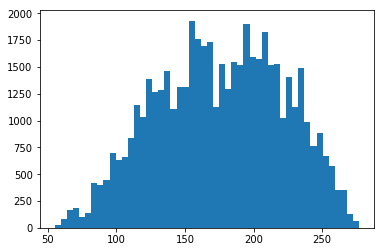

In [48]:
y = plt.hist(states_visited, bins=N//10)

In [50]:
pref = len(set(states_visited))/N
print('Percent of states visited: {}'.format(pref))

Percent of states visited: 0.446


In [ ]:
# probability of reaching a state via random walk = !?